In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math

# Supervised Learning -- Classification

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

In [8]:
print(classifier.predict([[-10,5]]))

NameError: name 'classifier' is not defined

In [9]:
def gen_custom_label(x):
    if np.sum(x) < 15:
        return 1
    return 0



def gen_custom_dataset(feat_num = 2, sample_num = 5000, max_value = 20, min_value = -20):
    data, labels = [], []
    for sam in range(sample_num):
        row = []
        for feat in range(feat_num):
            row.append(random.randint(min_value , max_value))
        data.append(row)
        labels.append(gen_custom_label(row))
    return np.asarray(data),np.asarray(labels)

In [10]:
X, Y = gen_custom_dataset(feat_num = 2, sample_num = 500, max_value = 20, min_value = -20)
print(np.shape(X))
print(np.shape(Y))
print('number of samples ={} and number of features = {}:'.format(np.shape(X)[0], np.shape(X)[1]))
print('\nFirst 5 samples:\n', X[:5])
print('\nFirst 5 labels:', Y[:5])

(500, 2)
(500,)
number of samples =500 and number of features = 2:

First 5 samples:
 [[  6  12]
 [-17 -16]
 [ -8   7]
 [ 10   3]
 [-16 -19]]

First 5 labels: [0 1 1 1 1]


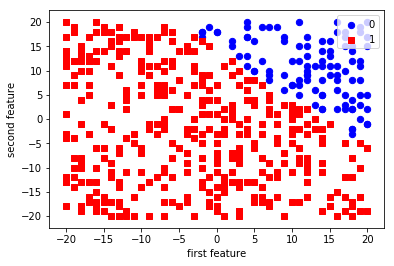

In [11]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

1. a training set that the learning algorithm uses to fit the model
2. a test set to evaluate the generalization performance of the model

The ``train_test_split`` function from the ``model_selection`` module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.




In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=Y)
print("num of train samples = {}".format(len(X_train)))
print("num of test samples = {}".format(len(X_test)))

num of train samples = 375
num of test samples = 125


### The scikit-learn estimator API


Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). For instance, we first import the logistic regression class.

In [13]:
from sklearn.linear_model import LogisticRegression

Next, we instantiate the estimator object.

In [14]:
classifier = LogisticRegression()

In [15]:
X_train.shape

(375, 2)

In [16]:
y_train.shape

(375,)

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [17]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [18]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [19]:
print(prediction)
print(y_test)

[1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [20]:
np.mean(prediction == y_test)

0.98399999999999999

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [21]:
classifier.score(X_test, y_test)

0.98399999999999999

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [22]:
classifier.score(X_train, y_train)

0.9946666666666667

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [23]:
print(classifier.coef_)
print(classifier.intercept_)

[[-0.38012188 -0.36652496]]
[ 5.23025867]
